## Confidence Intervals and Statistical Inference for Means
In this Notebook, we will work on confidence intervals and statistical inference for means. This particular Notebook is mostly adopted from the [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome) course of Duke University, converted from R to Python and tweaked to match the needs of our CSMODEL course.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email me at arren.antioquia@dlsu.edu.ph

## Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind

## Real Estate Data

We consider real estate data from the city of Ames, Iowa. The details of 
every real estate transaction in Ames is recorded by the City Assessor's 
office. Our particular focus for this lab will be all residential home sales 
in Ames between 2006 and 2010.  This collection represents our **population** of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population. Let's load the data.

In [9]:
ames_df = pd.read_csv("ames.csv", index_col="Order")
ames_df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Get a Sample

Here, we have access to the population data. But in most cases, we do not. Instead, we have to work with a **sample**. Here, let's try to take a sample from our population.

In [10]:
n = 60 # sample size
ames_sample_df = ames_df.sample(n, random_state=1)
ames_sample_df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,209500
2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,202665
46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,224000
2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal,187000


For now, we will only focus on the `Lot.Area` variable. Let us compute the summary statistics for this variable.

In [11]:
agg = ames_sample_df.agg({"Lot.Area": ["mean", "median", "std"]})

sample_mean = agg.loc["mean"][0]
sample_median = agg.loc["median"][0]
sample_std = agg.loc["std"][0]

print('{:.2f}'.format(sample_mean))
print('{:.2f}'.format(sample_median))
print('{:.2f}'.format(sample_std))

10846.62
8815.00
9262.26


**Question #1:** What is the mean of your sample?
- 10846.62

### Confidence Interval

Return for a moment to the question that first motivated this lab: based on this sample, what can we infer about the population? Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as $\bar{x}$. That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This uncertainty can be quantified using a confidence interval.

A confidence interval for a population mean is of the following form:

$$\bar{x} \pm z^* \frac{s}{\sqrt{n}}$$

Where $z^*$, also known as the **critical value**, is the z-score that corresponds to the middle 95% of the data.

We can use the `norm.ppf` function for this task, which will give the critical value associated with a given percentile under the normal distribution. Remember that confidence levels and percentiles are not equivalent. For example, a 95% confidence level refers to the middle 95% of the distribution, and the critical value associated with this area will correspond to the 97.5th percentile.

We can find the critical value for a 95% confidence interal using:

In [12]:
z_star_95 = norm.ppf(0.975)
print('{:.2f}'.format(z_star_95))

1.96


We can compute $z^* \frac{s}{\sqrt{n}}$ by plugging in the sample standard deviation. This is known as the **margin of error**.

In [13]:
margin_of_error = z_star_95 * (sample_std / np.sqrt(n))
print('{:.2f}'.format(margin_of_error))

2343.63


**Question #2:** Given a 95% confidence level, what is the margin of error?
- 2343.63

Therefore, the 95% confidence interval is the sample mean $\pm$ the margin of error.

In [14]:
minimum_value = sample_mean - margin_of_error
maximum_value = sample_mean + margin_of_error
print('{:.2f}'.format(minimum_value), '{:.2f}'.format(maximum_value))

8502.98 13190.25


**Question #3:** Specify the confidence interval (minimum value, maximum value) as a range.
- 10846.62 ± 2343.63
- \[8502.98, 13190.25\]

To recap: even though we don’t know what the full population looks like, we’re 95% confident that the true average size of houses in Ames lies between the values lower and upper. There are a few conditions that must be met for this interval to be valid.

**Question #4:** What are the conditions that need to be met for the central limit theorem for means and consequently, our confidence interval to be valid?

- Samples must be independent; and 
- Sample size of at least 30 (or population is normally distributed)


**Question #5:** Is our confidence interval valid, based on the above conditions?
- Yes, because our sample size is 60 and are independent.

### Verify if Our Range Covers the True Mean

In this case we have the rare luxury of knowing the true population mean since we have data on the entire population. Let’s calculate this value so that we can determine if our confidence intervals actually capture it.

Let us get the mean from the population (not the sample).

In [15]:
population_mean = ames_df.agg({"Lot.Area": "mean"})[0]
print('{:.2f}'.format(population_mean))

10147.92


**Question #6:** What is the true population mean? (Limit to 2 decimal places)
- 10147.92

**Question #7:** Is the true population mean within your confidence interval range?
- Yes

### Increase the Confidence Level to 99%

Let's get another sample from the population, where `n` is 60.

In [16]:
n = 60 # sample size
ames_sample_df = ames_df.sample(n, random_state=2)
ames_sample_df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1573,916325080,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000
2730,905300080,20,RL,100.0,13350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,142500
1700,528114050,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000
1070,528180110,120,RL,58.0,10110,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,336860
1437,907181120,60,RL,68.0,8998,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207500


Let's focus on the `Lot.Area` variable again. Compute the summary statistics - mean, median, and standard deviation for this variable.

In [19]:
# Write your code here
agg = ames_sample_df.agg({"Lot.Area": ["mean", "median", "std"]})
sample_mean = agg.loc["mean"][0]
sample_median = agg.loc["median"][0]
sample_std = agg.loc["std"][0]

agg

,Lot.Area
mean,10867.116667
median,9613.500000
std,6866.103299


**Question #8:** What is the mean of your new sample? Limit to 2 decimal places only.
- 10867.12

Now, let's increase the confidence level from 95% to 99%. Get the **critical value**, $z^*$, or the z-score that corresponds to the middle 99% of the data.

In [18]:
# Write your code here
z_star_99 = norm.ppf(0.995)
print('{:.2f}'.format(z_star_99))

2.58


Compute the margin of error.

In [20]:
# Write your code here
margin_of_error = z_star_99 * (sample_std / np.sqrt(n))
print('{:.2f}'.format(margin_of_error))

2283.24


**Question #9:** Given a 99% confidence level, what is the margin of error? Limit to 2 decimal places only.
- 2283.24

Get the confidence interval (minimum value, maximum value).

In [21]:
# Write your code here
minimum_value = sample_mean - margin_of_error
maximum_value = sample_mean + margin_of_error
print('{:.2f}'.format(minimum_value), '{:.2f}'.format(maximum_value))

8583.88 13150.36


**Question #10:** Specify the confidence interval (minimum value, maximum value) as a range. Limit to 2 decimal places only.
- \[8583.88, 13150.36\]

**Question #11:** Is the true population mean within your confidence interval range?
- Yes

From here, we have seen that even though we do not have access to the population, we can use a sample to estimate the the true population mean with the use of confidence intervals.

## Birth Records Data

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

Load the `nc` data set into our workspace.

In [22]:
nc_df = pd.read_csv("nc.csv")
nc_df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

- **`fage`**: father’s age in years.
- **`mage`**:	mother’s age in years.
- **`mature`**: maturity status of mother.
- **`weeks`**: length of pregnancy in weeks.
- **`premie`**: whether the birth was classified as premature (premie) or full-term.
- **`visits`**: number of hospital visits during pregnancy.
- **`marital`**: whether mother is married or not married at birth.
- **`gained`**: weight gained by mother during pregnancy in pounds.
- **`weight`**: weight of the baby at birth in pounds.
- **`lowbirthweight`**: whether baby was classified as low birthweight (low) or not (not low).
- **`gender`**: gender of the baby, female or male.
- **`habit`**: status of the mother as a nonsmoker or a smoker.
- **`whitemom`**:	whether mom is white or not white.

**Question #12:** What does each observation in this dataset represent?
- It represents a record of the birth state of the infant (eg: weight, premie/full-term, etc) as well as some factors that might affect the birth state such as smoking habits, race, age of parents

We will consider the possible relationship between a mother’s smoking habit (`habit`) and the weight (`weight`) of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

Let's use a boxplot to compare the two groups:

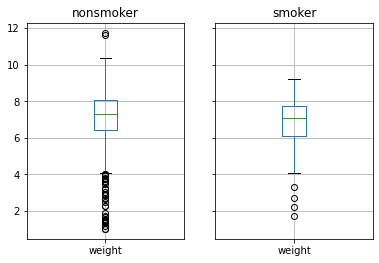

In [23]:
nc_df.groupby("habit").boxplot(column="weight")
plt.show()

Now let's look at the summary statistics across the two groups.

In [25]:
summary_stat = nc_df.groupby("habit").agg({"weight": ["mean", "median", "std", len]})
summary_stat

weight                        
               mean median       std    len
habit                                      
nonsmoker  7.144273   7.31  1.518681  873.0
smoker     6.828730   7.06  1.386180  126.0

It appears that babies of smokers tend to have less weight, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test.

### Hypothesis Test

Based on the our sample, the difference in the means of the baby weights for smokers and non-smokers is:

In [26]:
non_smoker_mean = summary_stat.loc["nonsmoker"].loc["weight"].loc["mean"]
smoker_mean = summary_stat.loc["smoker"].loc["weight"].loc["mean"]

diff = non_smoker_mean - smoker_mean
print('{:.2f}'.format(diff))

0.32


We set up our hypotheses as follows:

$H_0$ (null hypothesis): The true difference is 0.

$H_A$ (alternative hypothesis): The true difference is not 0.

Now, we can use a $t$-test to compare the two means from the unpaired groups. This function assumes that the null hypothesis is that the difference between the two means is 0, while the alternative hypothesis is that the diference between them is not 0. We set the `equal_var` parameter to `False` because we don't want to assume that the population has equal variances.

In [27]:
ttest_ind(nc_df[nc_df["habit"] == "smoker"]["weight"],
          nc_df[nc_df["habit"] == "nonsmoker"]["weight"],
          equal_var = False)

Ttest_indResult(statistic=-2.3590109449335013, pvalue=0.01945055644373227)

Note that you the function above is to perform a $t$-test for **independent means** (unpaired). We would need to use other functions if we need to perform tests for other groups. We leave this for you to find out.

**Question #13:** What can you conclude based on the $p$-value under a 5% significance level?
- We can reject the null hypothesis - the true difference is 0 - because there is significant difference between the two datasets ($p$-value < 5% significance level)

**Question #14:** Can we say that smoking among mothers causes their babies to be lighter? Why or why not?
- No because this is an observational study, so we can only conclude correlation (ie. not causation).

## Try It Yourself

Compute the **90%** confidence interval for the average baby weights using the `nc` dataset.

Get the sample mean.

In [28]:
# Write your code here
nc_agg = nc_df.agg({"weight": ["mean", "median", "std"]})

nc_n = len(nc_df.index)
nc_mean = nc_agg.loc["mean"][0]
nc_median = nc_agg.loc["median"][0]
nc_std = nc_agg.loc["std"][0]


nc_agg

,weight
mean,7.10100
median,7.31000
std,1.50886


**Question #15:** What is the sample mean? Limit to 2 decimal places only.
- 7.10

Get the confidence interval (minimum value, maximum value).

In [29]:
# Write your code here
nc_margin_of_error = norm.ppf(0.95) * (nc_std / np.sqrt(nc_n))

print([nc_mean - nc_margin_of_error, nc_mean + nc_margin_of_error])

[7.022516877253166, 7.179483122746834]


**Question #16:** Specify the confidence interval (minimum value, maximum value) as a range. Limit to 2 decimal places only.
- \[7.02, 7.18\]